# Bagging - Random Forest
Multiple Randomly created decision trees parallely

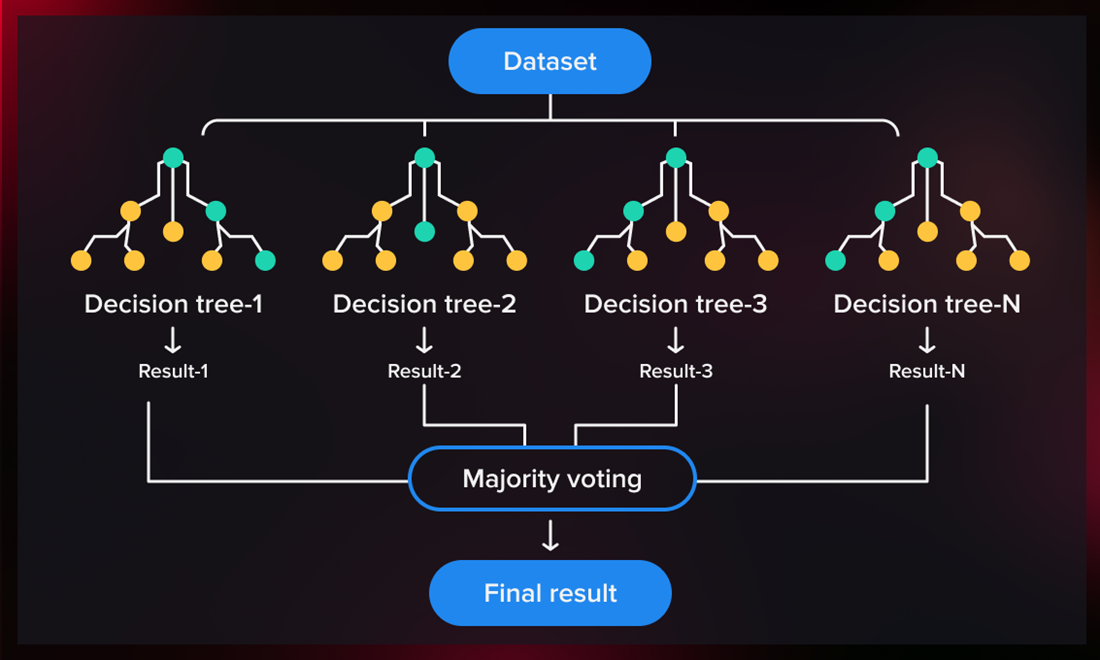

In [2]:
# To ignore non harmful warnings
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [3]:
import pandas as pd
df = pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


### Target - loan_status
1. 0 - Not approved
2. 1 - Approved

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [89]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [90]:
df.duplicated().sum()

np.int64(0)

### Step 2 - Seperate X and Y(loan_status)

In [7]:
X = df.drop(columns=["id", "loan_status"])
Y = df[["loan_status"]]

In [9]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [10]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


### Step 3 - Apply Preprocessing on X
cat - OneHotEncoding, con- StandardScaler

In [11]:
X.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [12]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [13]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [14]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [17]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [18]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [19]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 4 - Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [21]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
14337,1.400450,-0.370311,-1.187200,-0.362625,1.045295,-0.209808,2.279989,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091305,-0.549585,-0.429576,-0.758041,0.323635,-0.427932,0.790845,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422806,0.156966,-1.187200,-0.218837,-0.921970,-0.536994,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55811,1.897701,0.288785,-0.682117,1.039305,-1.363533,0.444564,1.287227,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40120,-0.920057,-0.486311,0.075506,-0.937775,-0.994465,-0.755118,-0.946489,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
ytrain.head()

,loan_status
14337,0
17117,0
32590,0
55811,0
40120,0


In [23]:
xtest.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
4657,-0.754307,-0.633949,-1.187200,-0.991696,-0.882427,-0.755118,-0.450108,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56440,-0.422806,-0.106673,1.085671,-0.758041,-0.688007,-0.864180,-0.450108,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42117,0.737448,0.059419,-1.187200,1.937978,0.610322,1.098935,0.046274,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10849,-0.920057,-0.897587,-1.187200,-0.758041,-0.028957,0.117378,-0.946489,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39395,-0.091305,-0.106673,-0.934659,-0.398572,0.504874,-0.427932,1.039036,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [25]:
xtrain.shape

(46916, 26)

In [26]:
xtest.shape

(11729, 26)

### Step 5 - Build the model
1. Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model1 = RandomForestClassifier(
    n_estimators = 1,
    min_samples_split= 2,
    min_samples_leaf= 1,
    criterion="entropy"
)

model1.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1)

In [35]:
model1.score(xtrain, ytrain)

0.967729559212209

In [36]:
model1.score(xtest, ytest)

0.9113308892488703

### Hyperparameter tuning

In [37]:
params1 = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [3, 4, 5, 6]
}

In [39]:
from sklearn.model_selection import RandomizedSearchCV

model_rf = RandomForestClassifier()
rscv_rf = RandomizedSearchCV(
    model_rf, param_distributions=params1, scoring="f1_macro", cv=5, n_jobs=-1)
rscv_rf.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [40]:
rscv_rf.best_params_

{'n_estimators': 200, 'max_depth': 6}

In [41]:
rscv_rf.best_score_

np.float64(0.8759469140728339)

In [43]:
best_rf = rscv_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=6, n_estimators=200)

### Model Eval Random Forest

In [44]:
best_rf.score(xtrain, ytrain)

0.9471182539005882

In [45]:
best_rf.score(xtest, ytest)

0.9467985335493222

In [46]:
ypred_test = best_rf.predict(xtest)

In [47]:
ypred_test[0:5]

array([0, 0, 0, 0, 0])

In [48]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


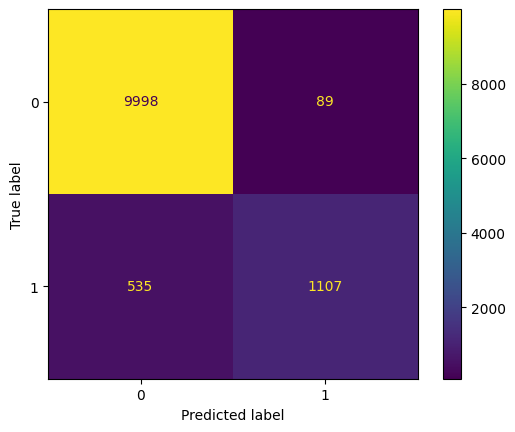

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_rf, xtest, ytest)

In [50]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10087
           1       0.93      0.67      0.78      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.83      0.87     11729
weighted avg       0.95      0.95      0.94     11729



### Gradient Boosing
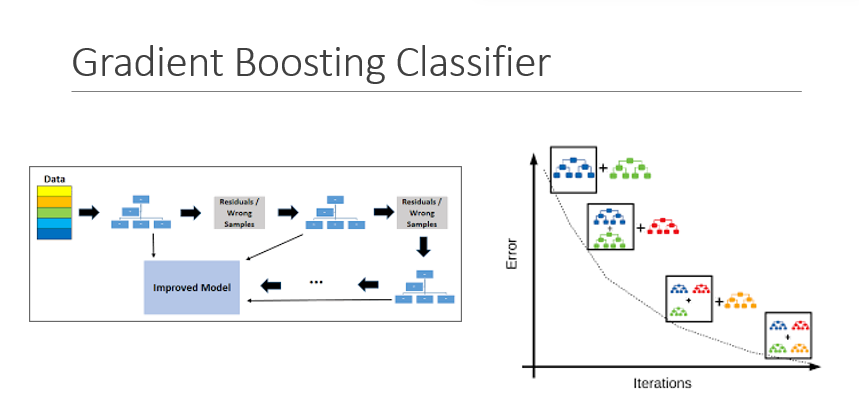

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
model2 = GradientBoostingClassifier(
    learning_rate=0.01,
    n_estimators=1,
    min_samples_leaf=1,
    min_samples_split=2
)

model2.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1)

In [59]:
model2.score(xtrain, ytrain)

0.8570210589138034

In [60]:
model2.score(xtest, ytest)

0.8600051155256203

In [61]:
params2 = {
    "learning_rate": [0.1, 0.2],
    "max_depth": [3, 4, 5]
}

In [62]:
model_gb = GradientBoostingClassifier()

rscv_gb = RandomizedSearchCV(
    model_gb, param_distributions=params2, scoring="f1_macro", cv=5, n_jobs=-1
)

rscv_gb.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2],
                                        'max_depth': [3, 4, 5]},
                   scoring='f1_macro')

In [63]:
rscv_gb.best_params_

{'max_depth': 5, 'learning_rate': 0.1}

In [64]:
rscv_gb.best_score_

np.float64(0.8909740129742898)

In [65]:
best_gb = rscv_gb.best_estimator_

### Evaluate gradient boost

In [66]:
ypred_test2 = best_gb.predict(xtest)
ypred_test2[0:5]

array([0, 0, 0, 0, 0])

In [67]:
ytest[0:5]

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


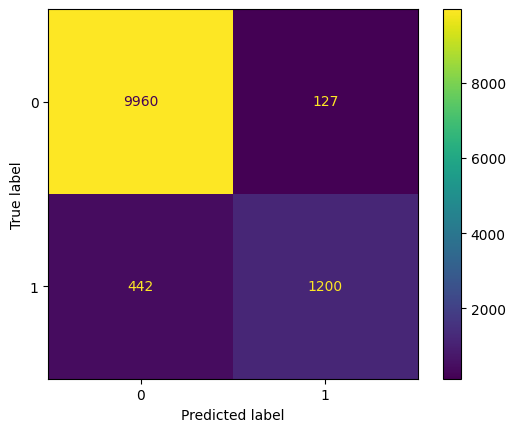

In [68]:
ConfusionMatrixDisplay.from_estimator(best_gb, xtest, ytest)

In [69]:
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.90      0.73      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



### XGBoost - Exteme Gradient Boosting

In [70]:
%pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 2.4/124.9 MB 13.4 MB/s eta 0:00:10
   -- ------------------------------------- 8.7/124.9 MB 22.4 MB/s eta 0:00:06
   ----- ---------------------------------- 16.3/124.9 MB 25.6 MB/s eta 0:00:05
   ------ --------------------------------- 20.2/124.9 MB 24.1 MB/s eta 0:00:05
   -------- ------------------------------- 26.2/124.9 MB 24.8 MB/s eta 0:00:04
   ---------- ----------------------------- 33.6/124.9 MB 26.6 MB/s eta 0:00:04
   ------------- -------------------------- 41.4/124.9 MB 28.0 MB/s eta 0:00:03
   --------------- ------------------------ 47.4/124.9 MB 28.5 MB/s eta 0:00:03
   ----------------- ---------------------- 56.1/124.9 MB 29.3 MB/s eta 0:00:03
   ------------------- -------------------- 62.1/124.9 MB 29.1 MB/s eta 0:00:03
   --------------------- ------------------ 68.7/124.9 MB 29.2 MB/s eta 0:00:02
   ------------------------ --------------- 75.5/12


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from xgboost import XGBClassifier

In [72]:
model_xgb = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=200)
model_xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
model_xgb.score(xtrain, ytrain)

0.952510870491943

In [74]:
model_xgb.score(xtest, ytest)

0.9519140591695797

In [76]:
ypred_test3 = model_xgb.predict(xtest)
ypred_test3[0:5]

array([0, 0, 0, 0, 0])

In [77]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_xgb, xtrain, ytrain, cv=5, scoring="f1_macro")

scores

array([0.88478104, 0.88423084, 0.89985046, 0.89269334, 0.88542783])

In [79]:
scores.mean()

np.float64(0.8893967002616483)

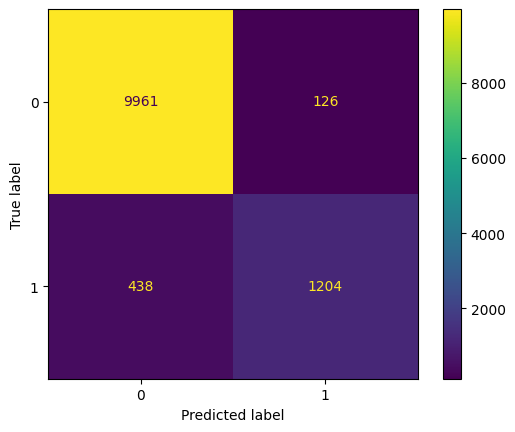

In [80]:
ConfusionMatrixDisplay.from_estimator(model_xgb, xtest, ytest)

In [81]:
print(classification_report(ytest, ypred_test3))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.91      0.73      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



### Feature importances

In [82]:
model_xgb.feature_importances_

array([0.01228689, 0.02353231, 0.02174235, 0.00489048, 0.10798272,
       0.1705936 , 0.00206315, 0.00578904, 0.00325656, 0.03147604,
       0.13920443, 0.03693604, 0.01232585, 0.03401098, 0.02847158,
       0.00574975, 0.02328671, 0.        , 0.00730327, 0.17365435,
       0.1402917 , 0.00801223, 0.00277507, 0.00158198, 0.00278294,
       0.        ], dtype=float32)

In [83]:
imp = pd.Series(model_xgb.feature_importances_, index=xtrain.columns)

In [84]:
imp

num__person_age                        0.012287
num__person_income                     0.023532
num__person_emp_length                 0.021742
num__loan_amnt                         0.004890
num__loan_int_rate                     0.107983
num__loan_percent_income               0.170594
num__cb_person_cred_hist_length        0.002063
cat__person_home_ownership_MORTGAGE    0.005789
cat__person_home_ownership_OTHER       0.003257
cat__person_home_ownership_OWN         0.031476
cat__person_home_ownership_RENT        0.139204
cat__loan_intent_DEBTCONSOLIDATION     0.036936
cat__loan_intent_EDUCATION             0.012326
cat__loan_intent_HOMEIMPROVEMENT       0.034011
cat__loan_intent_MEDICAL               0.028472
cat__loan_intent_PERSONAL              0.005750
cat__loan_intent_VENTURE               0.023287
cat__loan_grade_A                      0.000000
cat__loan_grade_B                      0.007303
cat__loan_grade_C                      0.173654
cat__loan_grade_D                      0

<Axes: >

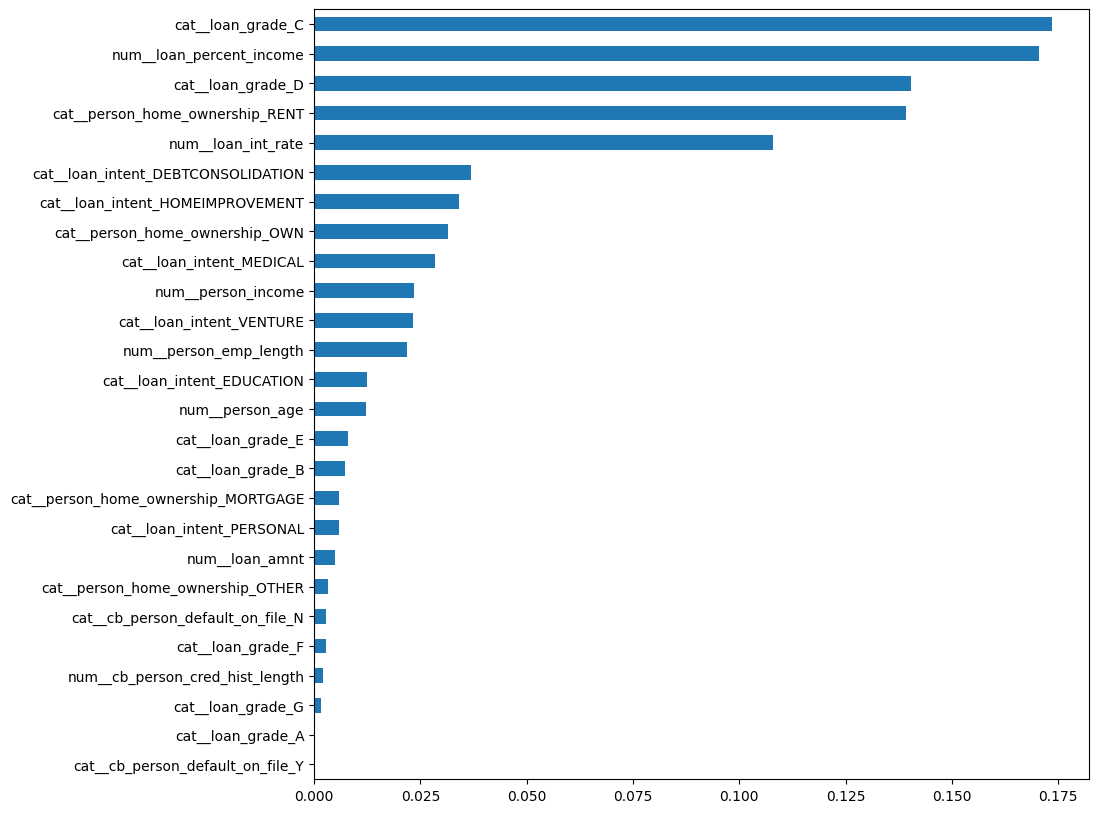

In [87]:
imp.sort_values().plot(kind="barh", figsize=(10, 10))

### Step 8 - Out of Sample prediction

In [91]:
xnew = pd.read_csv("test_loan.csv")
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [92]:
xnew.shape

(39098, 12)

In [93]:
model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [94]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [95]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [97]:
preds = model_xgb.predict(xnew_pre)
preds[0:5]

array([1, 0, 0, 0, 0])

In [100]:
probs = model_xgb.predict_proba(xnew_pre)
probs[0:5]

array([[0.01785254, 0.98214746],
       [0.9753213 , 0.0246787 ],
       [0.554392  , 0.445608  ],
       [0.9840938 , 0.01590621],
       [0.8718401 , 0.12815987]], dtype=float32)

In [101]:
probs_1 = probs[:, 1]
probs_1

array([0.98214746, 0.0246787 , 0.445608  , ..., 0.02305791, 0.30642465,
       0.96226937], dtype=float32)

In [102]:
res = xnew[["id"]]
res

,id
0,58645
1,58646
2,58647
3,58648
4,58649
...,...
39093,97738
39094,97739
39095,97740
39096,97741


In [103]:
res["loan_status"] = preds
res["prob"] = probs_1

In [104]:
res

,id,loan_status,prob
0,58645,1,0.982147
1,58646,0,0.024679
2,58647,0,0.445608
3,58648,0,0.015906
4,58649,0,0.128160
...,...,...,...
39093,97738,0,0.070551
39094,97739,0,0.009027
39095,97740,0,0.023058
39096,97741,0,0.306425


In [105]:
res = res.round(4)

In [106]:
res

,id,loan_status,prob
0,58645,1,0.9821
1,58646,0,0.0247
2,58647,0,0.4456
3,58648,0,0.0159
4,58649,0,0.1282
...,...,...,...
39093,97738,0,0.0706
39094,97739,0,0.0090
39095,97740,0,0.0231
39096,97741,0,0.3064


In [107]:
res.to_csv("XGBResults.csv", index=False)

### Save pre and best model

In [108]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [110]:
model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [111]:
import joblib

In [112]:
joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [113]:
joblib.dump(model_xgb, "xgbmodel.joblib")

['xgbmodel.joblib']

### Load the model object

In [114]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [115]:
m = joblib.load("xgbmodel.joblib")
m

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)